# IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import psycopg2 as ps
import csv

from scipy import stats

In [2]:
connection=conn=ps.connect(
    
    database="employee",
    user="postgres",
    password="Sahil@2102",port=5432
)

In [3]:
cursor=connection.cursor()
cursor.execute("Drop table if exists glass")
cursor.execute("CREATE TABLE glass(RI float ,Na float,Mg float,Al float,Si float,K float,Ca float,Ba float,Fe float,Type int)")

In [4]:
with open('glass.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader) 
connection.commit()

In [5]:
with open('glass.csv', 'r') as f:
   
    next(f) 
    cursor.copy_from(f, 'glass', sep=',')

connection.commit()

In [6]:
cursor.execute('select * from glass')
cursor.fetchall()

[(1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0.0, 0.0, 1),
 (1.51761, 13.89, 3.6, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0, 1),
 (1.51618, 13.53, 3.55, 1.54, 72.99, 0.39, 7.78, 0.0, 0.0, 1),
 (1.51766, 13.21, 3.69, 1.29, 72.61, 0.57, 8.22, 0.0, 0.0, 1),
 (1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0, 1),
 (1.51596, 12.79, 3.61, 1.62, 72.97, 0.64, 8.07, 0.0, 0.26, 1),
 (1.51743, 13.3, 3.6, 1.14, 73.09, 0.58, 8.17, 0.0, 0.0, 1),
 (1.51756, 13.15, 3.61, 1.05, 73.24, 0.57, 8.24, 0.0, 0.0, 1),
 (1.51918, 14.04, 3.58, 1.37, 72.08, 0.56, 8.3, 0.0, 0.0, 1),
 (1.51755, 13.0, 3.6, 1.36, 72.99, 0.57, 8.4, 0.0, 0.11, 1),
 (1.51571, 12.72, 3.46, 1.56, 73.2, 0.67, 8.09, 0.0, 0.24, 1),
 (1.51763, 12.8, 3.66, 1.27, 73.01, 0.6, 8.56, 0.0, 0.0, 1),
 (1.51589, 12.88, 3.43, 1.4, 73.28, 0.69, 8.05, 0.0, 0.24, 1),
 (1.51748, 12.86, 3.56, 1.27, 73.21, 0.54, 8.38, 0.0, 0.17, 1),
 (1.51763, 12.61, 3.59, 1.31, 73.29, 0.58, 8.5, 0.0, 0.0, 1),
 (1.51761, 12.81, 3.54, 1.23, 73.24, 0.58, 8.39, 0.0, 0.0, 1),


In [7]:
df=pd.read_sql('select * from glass',connection)

In [8]:
df

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
df.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [10]:
df.tail(10)

,ri,na,mg,al,si,k,ca,ba,fe,type
204,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [11]:
df.shape

(214, 10)

In [12]:
df.describe()

,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Every feature except for the target(Type) is continuous.

In [13]:
df.isnull().sum()

ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

There are no null values.

# EDA

In [14]:
background_color = '#FFFED7'
color_palette = ['#669900', '#CC99FF', '#00B050', '#00B0F0', '#FFC000', '#00FF00', '#002060', '#FF00FF', '#6600CC']

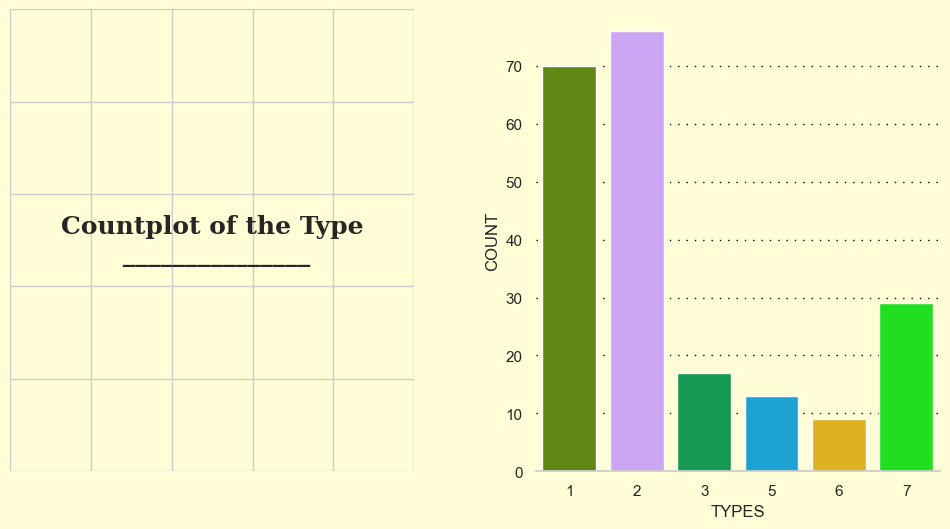

In [44]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.25)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Title
ax0.text(0.5, 0.5, 'Countplot of the Type\n _______________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)

# Type
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.countplot(x='type', data=df, palette=color_palette, ax=ax1)
ax1.set_xlabel('TYPES')
ax1.set_ylabel('COUNT')


axes = [ax0, ax1]
for s in ["top","right","left"]:
    for ax in axes:
        ax.spines[s].set_visible(False)

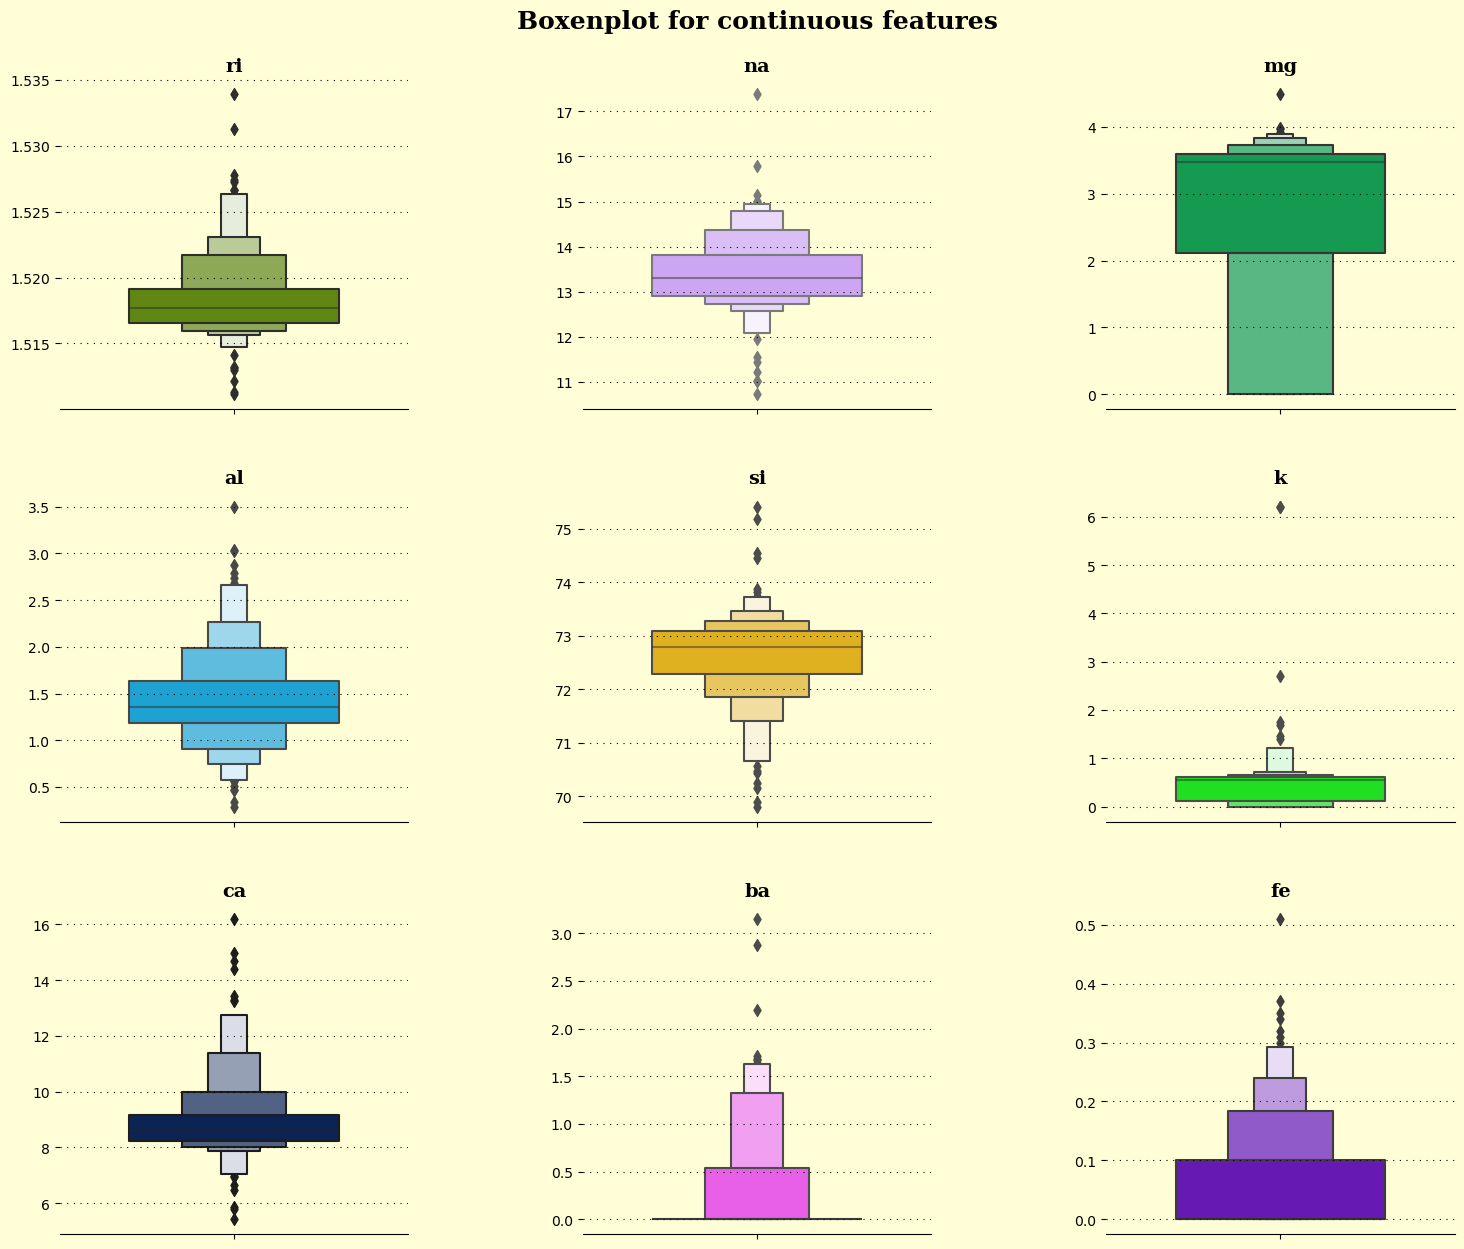

In [16]:





fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.5, hspace=0.25)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
fig.patch.set_facecolor(background_color)


# Title
ax1.text(0, 19, 'Boxenplot for continuous features',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')

for i, ax in enumerate(axes):
    ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.boxenplot(y=df.columns[i], data=df, ax=ax, palette=[color_palette[i]], width=0.6)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)


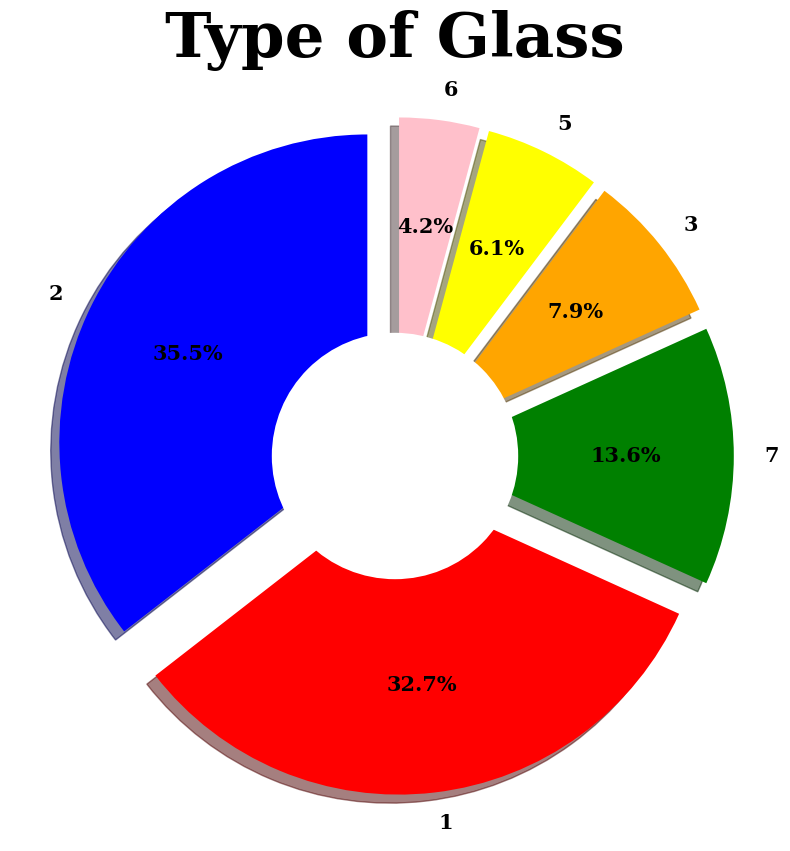

In [17]:
glass_data = df['type'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(glass_data,
 labels = glass_data.index,
 colors = ['blue', 'red', 'green', 'orange',
 'yellow', 'pink'],
 pctdistance = 0.65,
 shadow = True,
 startangle = 90,
 explode = explode,
 autopct = '%1.1f%%',
 textprops={ 'fontsize': 15,
 'color': 'black',
'weight': 'bold',
'family': 'serif' })
plt.setp(pcts, color='black')
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Type of Glass', size=45, **hfont)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

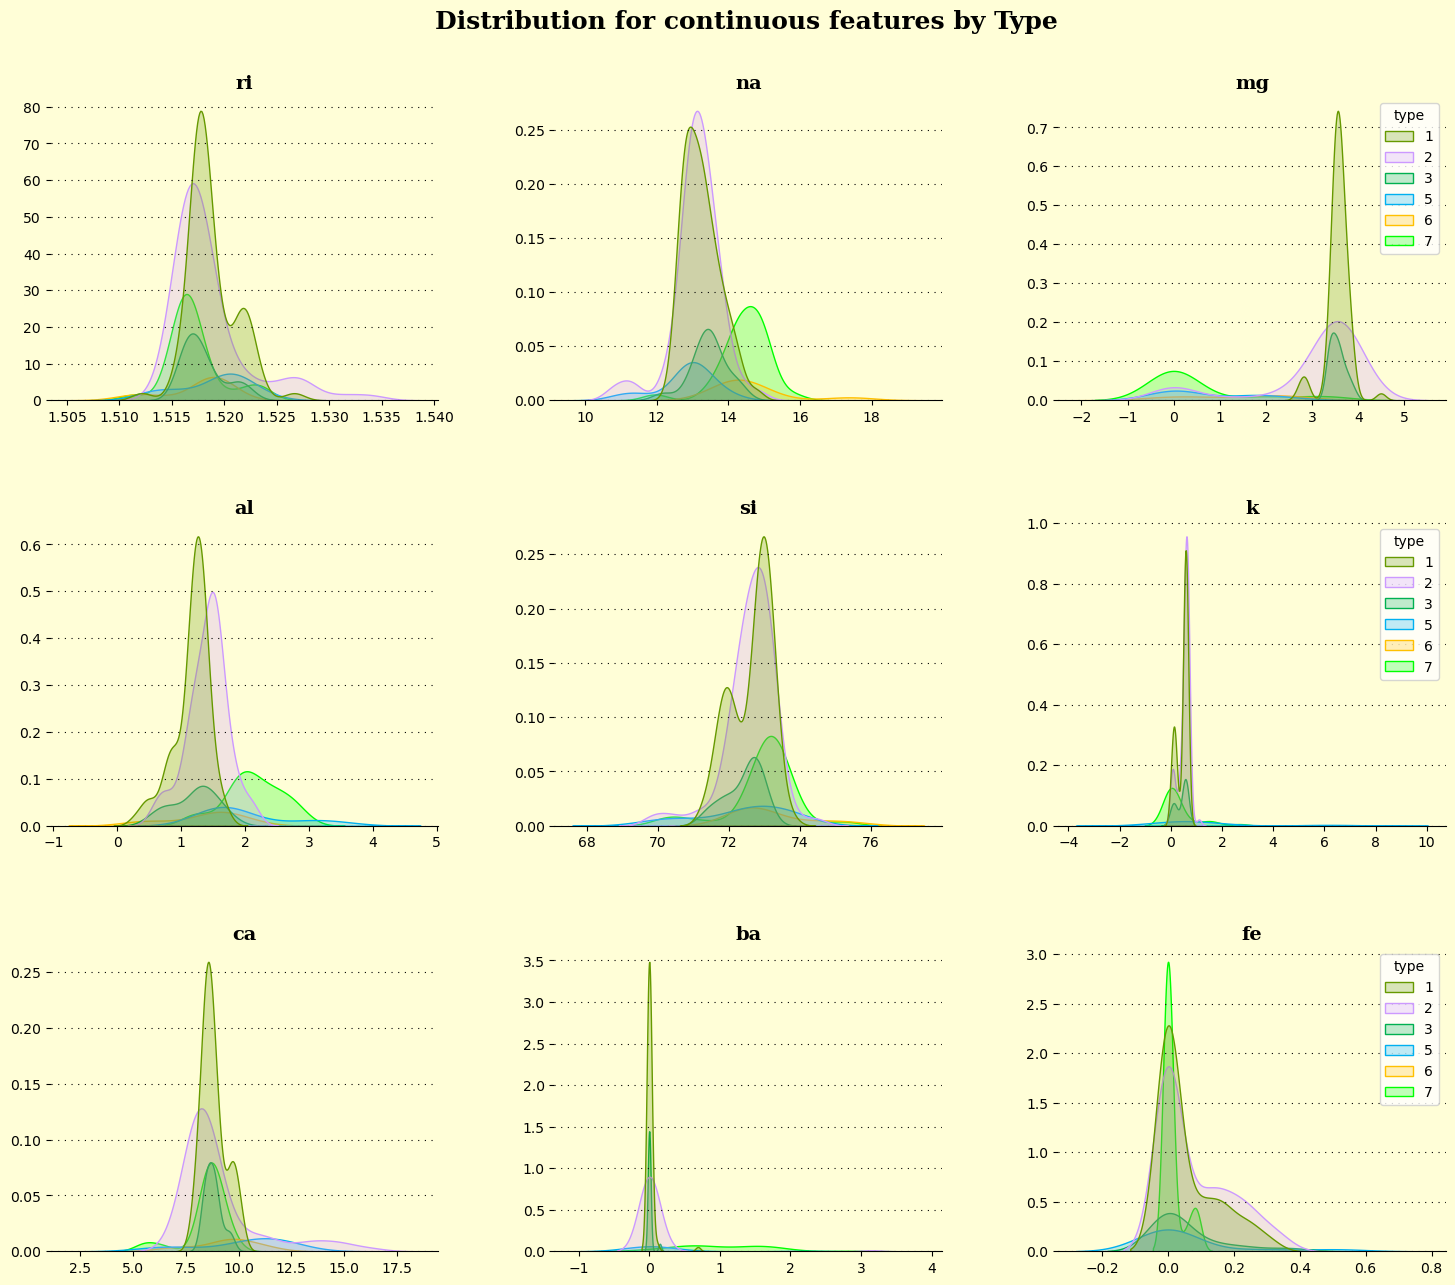

In [18]:
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.4)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
kde_palette = color_palette[0:6]
fig.patch.set_facecolor(background_color)
    
# Title
ax1.text(14.5, 0.35, 'Distribution for continuous features by Type',
        fontsize=18, fontfamily='serif', fontweight='bold',
       horizontalalignment='center',
        verticalalignment='center')

for i, ax in enumerate(axes):
    dp_legend = False
    if i in [2, 5, 8]:
        dp_legend = True
    
    ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.kdeplot(x=df.columns[i], hue='type', data=df, fill=True, ax=ax, palette=kde_palette, legend=dp_legend)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)


In [19]:
df_cor = df.drop('type', axis=1).corr()
df_cor

,ri,na,mg,al,si,k,ca,ba,fe
ri,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
k,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

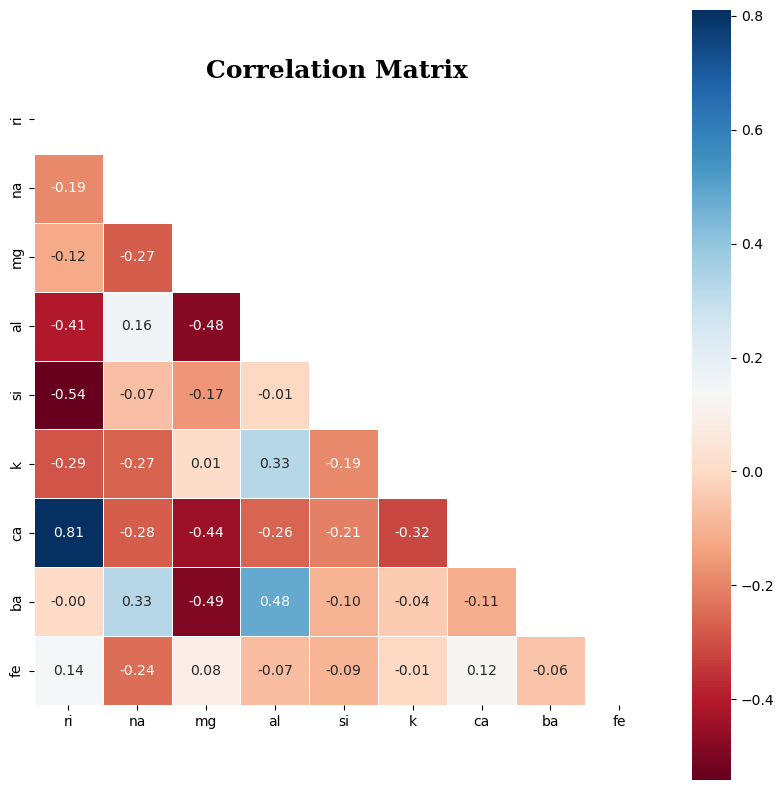

In [20]:
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.3, hspace=0.1)
ax0 = fig.add_subplot(gs[0,0])

mask = np.triu(np.ones_like(df_cor))
ax0.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold',
        fontfamily='serif')
sns.heatmap(df_cor,  annot=True, fmt='.2f', cmap='RdBu', square=True, mask=mask, linewidth=0.7)

Scatterplot of some correlated features.

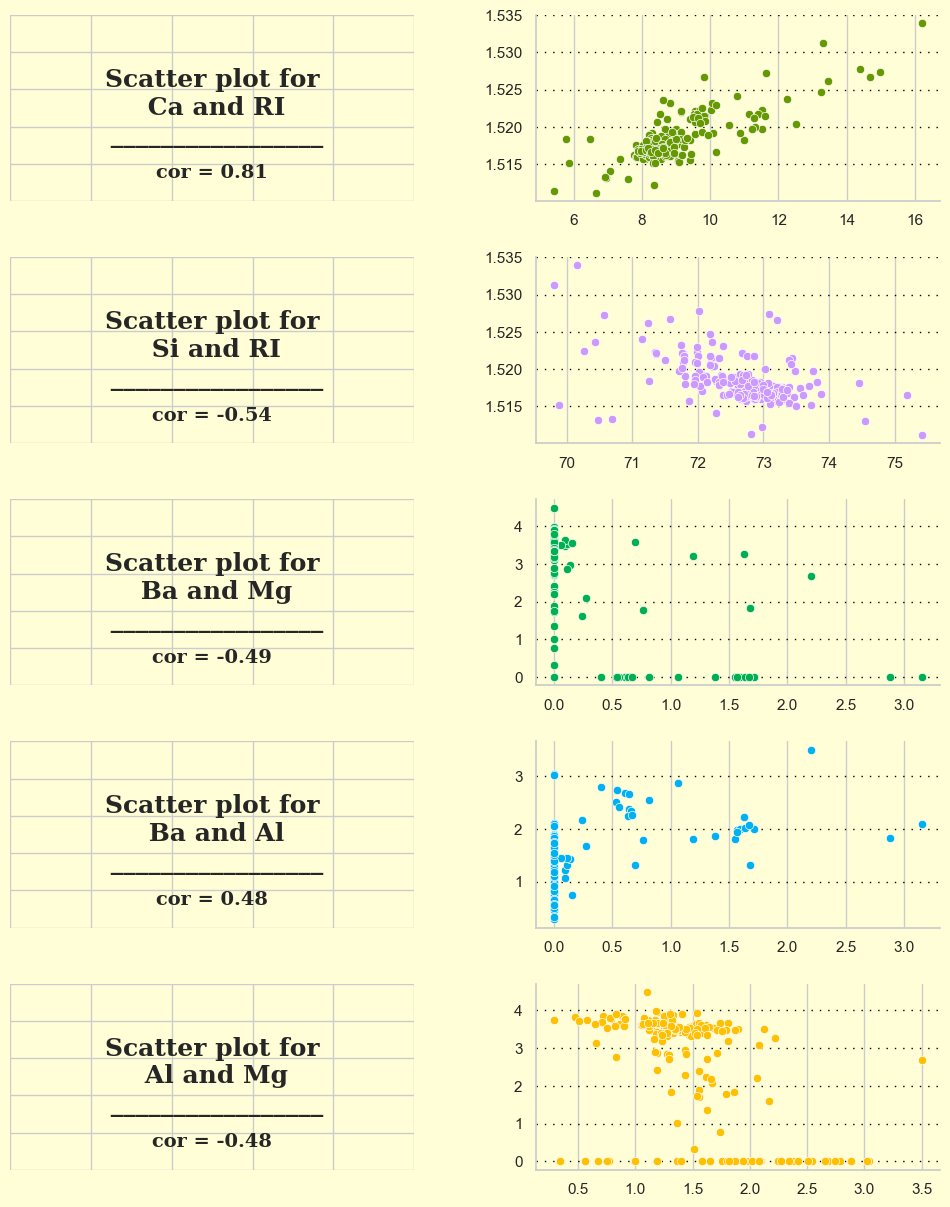

In [42]:
fig = plt.figure(figsize=(12, 15))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
fig.patch.set_facecolor(background_color)


# Ca and RI
cor = round(stats.pearsonr(df['ca'], df['ri'])[0], 2)
ax0.text(0.5, 0.5,
        'Scatter plot for\n Ca and RI\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax0.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='ca', y='ri', data=df, ax=ax1, color=color_palette[0])


# Si and RI
cor = round(stats.pearsonr(df['si'], df['ri'])[0], 2)
ax2.text(0.5, 0.5,
        'Scatter plot for\n Si and RI\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax2.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='si', y='ri', data=df, ax=ax3, color=color_palette[1])


# Ba and Mg
cor = round(stats.pearsonr(df['ba'], df['mg'])[0], 2)
ax4.text(0.5, 0.5,
        'Scatter plot for\n Ba and Mg\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax4.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='ba', y='mg', data=df, ax=ax5, color=color_palette[2])


# Ba and Al
cor = round(stats.pearsonr(df['ba'], df['al'])[0], 2)
ax6.text(0.5, 0.5,
        'Scatter plot for\n Ba and Al\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax6.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='ba', y='al', data=df, ax=ax7, color=color_palette[3])


# Al and Mg
cor = round(stats.pearsonr(df['al'], df['mg'])[0], 2)
ax8.text(0.5, 0.5,
        'Scatter plot for\n Al and Mg\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax8.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='al', y='mg', data=df, ax=ax9, color=color_palette[4])


for ax in axes:
    ax.set_facecolor(background_color)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4, ax6, ax8]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    for s in ['left', 'bottom']:
        ax.spines[s].set_visible(False)

# Modeling

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [23]:
X = df.drop('type', axis=1)
y = df['type']

scaler = RobustScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=40)

In [24]:
logreg = LogisticRegression(random_state=1010)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = accuracy_score(y_pred, y_test)*100

print('Accuracy Score of Logistic Regression :', round(score_logreg,2))

Accuracy Score of Logistic Regression : 63.95


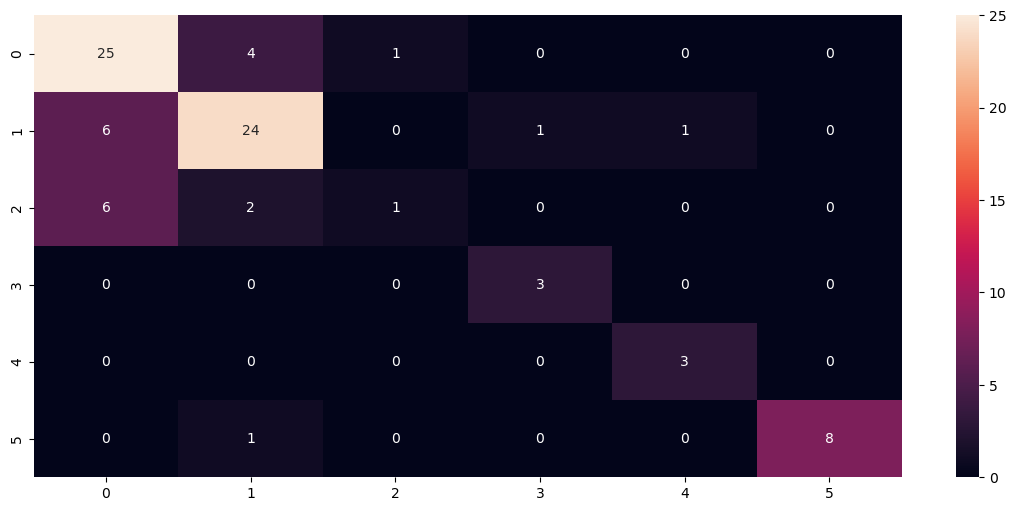

Accuracy Score of Random Forest Classifier : 74.42


In [25]:
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred) 
plt.figure(figsize = (14,6))
sns.heatmap(cm_rf, annot = True)
plt.show()
score_rf = accuracy_score(y_pred, y_test)*100
print('Accuracy Score of Random Forest Classifier :', round(score_rf,2))

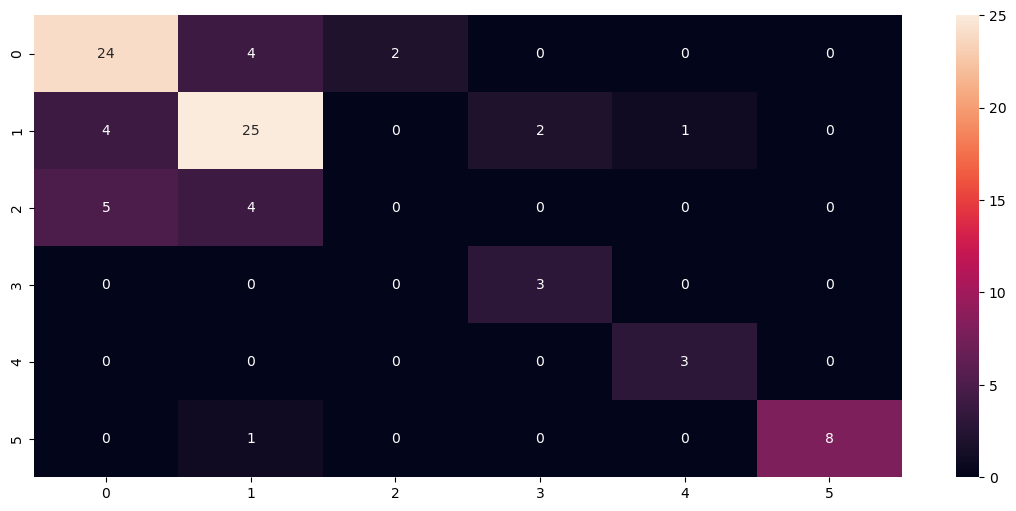

Accuracy Score of Gradient Boosting Classifier : 73.26


In [26]:
gbc = GradientBoostingClassifier(random_state=dom_state=200)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
score_gbc = accuracy_score(y_pred, y_test)*100
cm_gb = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,6))
sns.heatmap(cm_gb, annot = True)
plt.show()

print('Accuracy Score of Gradient Boosting Classifier :', round(score_gbc,2))

In [39]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
plt.show()
score_dt = accuracy_score(y_pred, y_test)*100

print('Accuracy Score of Decision Tree Classifier :', round(score_dt,2))

Accuracy Score of Decision Tree Classifier : 72.09


Accuracy Score of K-Nearest Neighbors Classifier :  70.93


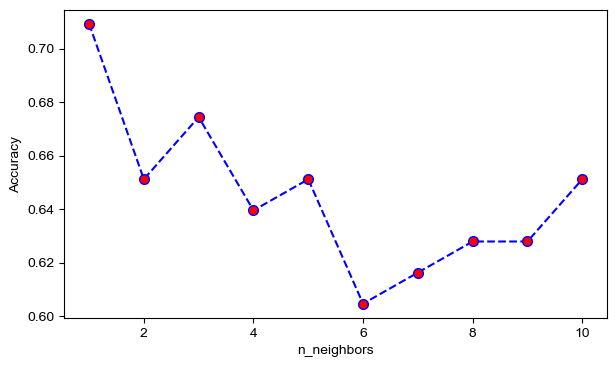

In [28]:
# Find n_neighbors for best score
accuracy = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))

score_knn = max(accuracy)*100
print('Accuracy Score of K-Nearest Neighbors Classifier : ', round(score_knn,2))

plt.figure(figsize=(7, 4))
plt.plot(range(1,11), accuracy, linestyle='dashed', marker='o', color='blue',
        markersize=7, markerfacecolor='red')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
sns.set_theme(style='whitegrid')
plt.show()

In [37]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score_svm = accuracy_score(y_pred, y_test)*100

print('Accuracy Score of Support Vector Classifier :', round(score_svm, 2))

Accuracy Score of Support Vector Classifier : 72.09


In [35]:
mes=pd.DataFrame({'Model' : ['Logistic Regression', 'RandomForest', 'Gradient Boosting', 
                         'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Classifier'],
             'Score' : [round(score_logreg,2),round(score_rf,2), round(score_gbc,2), round(score_dt,2), round(score_knn,2), round(score_svm,2)]})
mes

,Model,Score
0,Logistic Regression,63.95
1,RandomForest,74.42
2,Gradient Boosting,73.26
3,Decision Tree,72.09
4,K-Nearest Neighbors,70.93
5,Support Vector Classifier,72.09


In [31]:
mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   6 non-null      object 
 1   Score   6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


In [32]:
mes.shape

(6, 2)

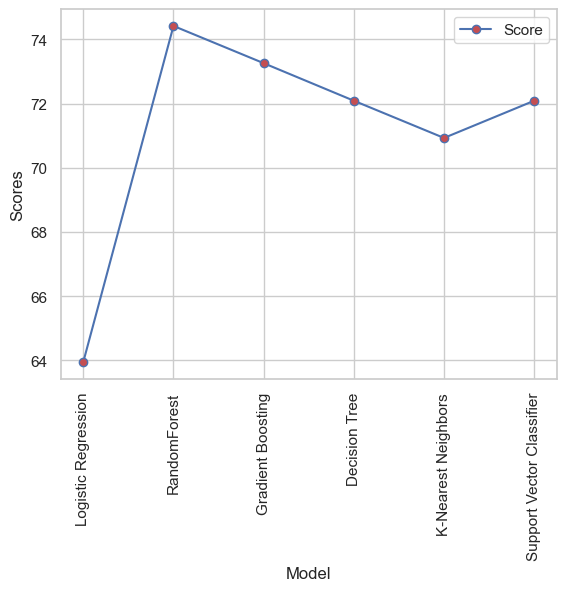

In [40]:
plt.plot(mes['Score'],'-o',mfc='r')
labels=mes['Model']
x=[0,1,2,3,4,5]
plt.xticks(x, labels, rotation ='vertical')
plt.legend(['Score','Model'])
plt.xlabel("Model")
plt.ylabel("Scores")
plt.show()
sns.set_theme(style='whitegrid')